<a href="https://colab.research.google.com/github/Oruka01/Food-Sale-Predictions/blob/main/salespredictions101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Loading the the data
sales_predictions = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 1.  How many rows and columns?

In [4]:
# Getting the shape of the data frame
df.shape
print('There are ', df.shape,'rows and columns respectively')

There are  (8523, 12) rows and columns respectively


### 2. What are the datatypes of each variable?

In [5]:
# examining the data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# statistical overview of the dataset
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## 3. Are there duplicates? If so, drop any duplicates.

In [7]:
# determining if there are duplicates in the dataset

df.duplicated().sum()

0

## 4.  Identify missing values.

In [8]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [9]:
# Getting the total number of rows and columns in the dataframe
df.shape

(8523, 12)

In [10]:
# Getting the non-null values in the item weight column
Av_values = df['Item_Weight'].count()
Av_values

7060

In [11]:
# Getting the missing values in the item weight column
null = len(df) - df['Item_Weight'].count()
null

1463

In [12]:
# Based on the number of the missing valuesas compared to ther available values, i prefer to drop the missing values in the 
# item weight coloumn because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['Item_Weight'], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

6. Confirm that there are no missing values after addressing them.

In [13]:
# Deleting the Outlet_Size column because its not significant in the computation
# for the analysis also the Outlet_Location_Type column is a better substitution 

df.drop(columns='Outlet_Size', inplace=True)
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7 Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [14]:
# fixing the LF, Reg with the Low Fat and Regular

In [15]:
# I dentifying the unique values in the column
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')

df['Item_Fat_Content'].value_counts()


Low Fat    4566
Regular    2388
reg         106
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

 8 For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [18]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,7060.00,7060.00,7060.00,7060.00
mean,12.86,0.06,141.24,2000.49,2118.63
std,4.64,0.05,62.41,6.59,1533.45
min,4.56,0.00,31.49,1987.00,33.29
25%,8.77,0.03,94.14,1997.00,922.80
50%,12.60,0.05,142.73,2002.00,1789.67
75%,16.85,0.09,186.02,2007.00,2966.14
max,21.35,0.31,266.89,2009.00,10256.65


Histogram to view the distributions of various features in your dataset.

Text(0.5, 0, 'Tier type')

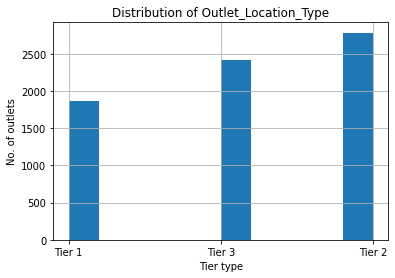

In [19]:
# Viewing the distribution of the different tiers using a histogram
df['Outlet_Location_Type'].hist()
plt.title('Distribution of Outlet_Location_Type')
plt.ylabel('No. of outlets')
plt.xlabel('Tier type')

By the histogram above its evident that Tier2 are more followed by the tier3 and then the tier1 

Text(0.5, 0, 'Outlet type')

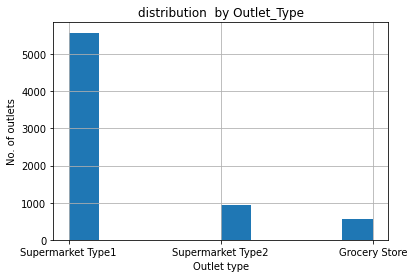

In [20]:
# Viewing the distribution of the Item_Outlet_Sales using a histogram
df['Outlet_Type'].hist(bins = 10)
plt.title('distribution  by Outlet_Type')
plt.ylabel('No. of outlets')
plt.xlabel('Outlet type')

In [21]:
# The supermarkets type1  are more followed by the type2 and lastly the grocery stores

Boxplot to view statistical summaries of various features in your dataset.

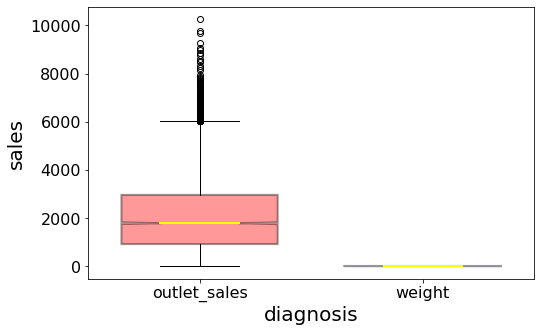

In [22]:
outlet_sales = df['Item_Outlet_Sales']
weight = df['Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([outlet_sales,weight],
           notch = True,
           labels=['outlet_sales', 'weight'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);


In [23]:
# the outlet sales are go beyond the usual average sales systematically. 
# The weight on the other hand seems to stay constant without any changes to the respective items sold

Heatmap of the correlation between features.

<AxesSubplot:>

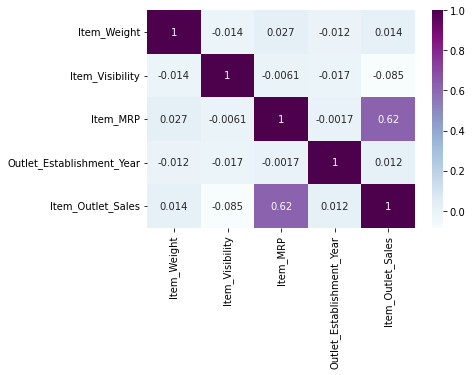

In [24]:
# Plotting the heat map to show the correlation between the various features 
corr = df.corr()
sns.heatmap(corr, cmap = 'BuPu', annot = True)


In [25]:
# There is a modorate correlation between the item MRP and the Item outlet sales.
# While there is a positive but low correlation between item MRP and Item weight, item outlet sales and outlet_est_year,
# item weight and item MRP, item weigh ann item outlet sales

Bar graph showing the sales according to item fat content

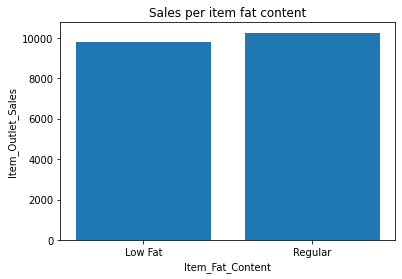

In [26]:
# This is comparing sales of Low Fat and Regular 
plt.bar(df['Item_Fat_Content'], df['Item_Outlet_Sales'])
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Sales per item fat content')
plt.show()

In [27]:
# There are more sales received from the sale of regular items compared to the low fat items much as they are closure

Bar graph showing the sales performance of each outlet

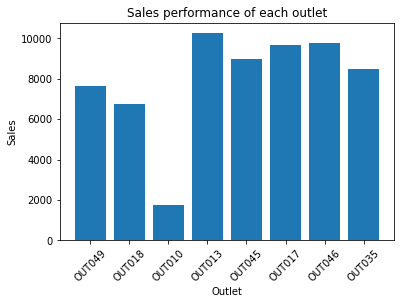

In [28]:
# Bar graph showing the sales performance of each outlet

# This is showing me how each outlet is performing in terms of sales
plt.bar(df['Outlet_Identifier'], df['Item_Outlet_Sales'])
plt.xlabel('Outlet')
plt.ylabel('Sales')
plt.title('Sales performance of each outlet')
plt.xticks(rotation = 45)
plt.show()

In [29]:
# The outlet 13 made the most sales while the outlet 010 made the least sales.

VISUALIZATIONS

In [30]:
# Creating dataframes for each outlet type
SupermktType1_df = df[df['Outlet_Type'] == 'Supermarket Type1']
SupermktType2_df = df[df['Outlet_Type'] == 'Supermarket Type2']
Grocery_store_df = df[df['Outlet_Type'] == 'Grocery Store']

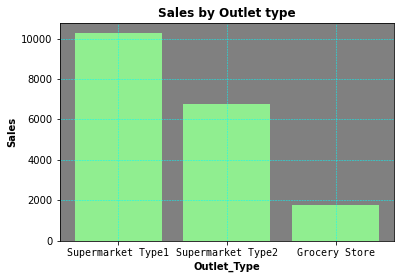

In [31]:
# Barchart showing sales as per outlet type
ax = plt.axes()
ax.set_facecolor("gray")
plt.bar(df['Outlet_Type'], df['Item_Outlet_Sales'], color = 'lightgreen')

plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize=10, fontname='monospace')

plt.ylabel('Sales', fontweight='bold')
plt.xlabel('Outlet_Type', fontweight='bold')
plt.title('Sales by Outlet type', fontweight='bold')
plt.show()

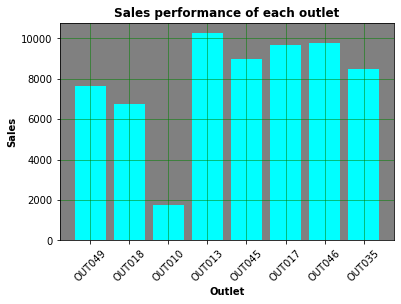

In [32]:
# Bar graph showing the sales performance of each outlet

# This is showing me how each outlet is performing in terms of sales
ax = plt.axes()
ax.set_facecolor("gray")
plt.bar(df['Outlet_Identifier'], df['Item_Outlet_Sales'], color = 'cyan')
plt.grid(color = 'green', linestyle = '-', linewidth = 0.5)
# labels
plt.xlabel('Outlet',fontweight='bold')
plt.ylabel('Sales',fontweight='bold')
plt.title('Sales performance of each outlet',fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Heatmap showing relations among various variables')

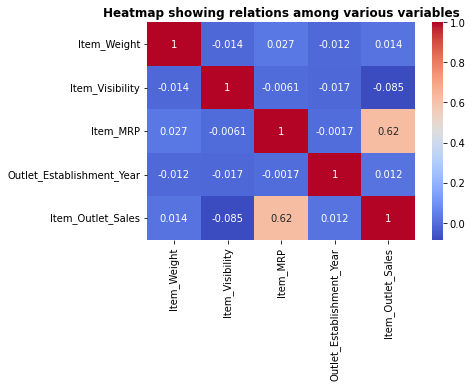

In [33]:
# Plotting the heat map to show the correlation between the various features 
ax = plt.axes()
ax.set_facecolor("gray")
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, cbar=True,)
plt.title('Heatmap showing relations among various variables',fontweight='bold')

Boxplot

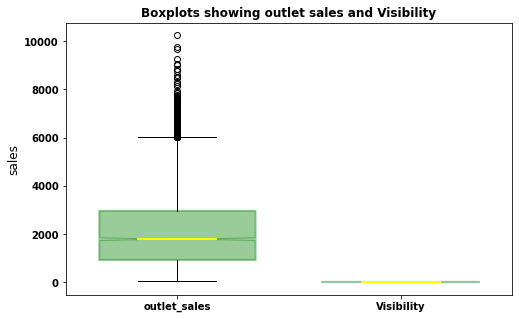

In [34]:
outlet_sales = df['Item_Outlet_Sales']
Visibility = df['Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([outlet_sales,weight],
           notch = True,
           labels=['outlet_sales', 'Visibility'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='green', facecolor = 'blue', alpha = .4,)
          );
# labels
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('green')
plt.title('Boxplots showing outlet sales and Visibility',fontweight='bold')
plt.ylabel('sales', fontsize = 12);
plt.xticks(fontsize = 10,fontweight='bold');
plt.yticks(fontsize = 10,fontweight='bold');

## Helping the retailer by using machine learning to make predictions about future sales based on the data provided.

In [35]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [36]:
# Lets take a look at this column names once more for instatiation purposes
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700


In [37]:
# Getting to know data types, and, confirm if there are also any missing values
# by looking at the non null tallies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Location_Type       7060 non-null   object 
 9   Outlet_Type                7060 non-null   object 
 10  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 661.9+ KB


# Encoding the data
so we have 3 columns with ordinal data and we shall replace them by ordinal
encoding

In [38]:
# Ordinal Encoding
df['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [39]:
# Replacing the ordinal feartures of the Item_Fat_Content column
replace_fat = {'Regular':2, 'Low Fat':1}
df['Item_Fat_Content'].replace(replace_fat, inplace=True)
df['Item_Fat_Content']

0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 7060, dtype: int64

In [40]:
df['Outlet_Location_Type'].value_counts()

Tier 2    2785
Tier 3    2415
Tier 1    1860
Name: Outlet_Location_Type, dtype: int64

In [41]:
# Replacing the ordinal feartures of the Outlet_Location_Type column
replace_outloctype = {'Tier 3':3, 'Tier 2':2, 'Tier 1':1}
df['Outlet_Location_Type'].replace(replace_outloctype, inplace=True)
df['Outlet_Location_Type']


0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 7060, dtype: int64

In [42]:
# Replacing the ordinal feartures of the Outlet_Type column
replace_outtype = {'Supermarket Type2':3, 'Supermarket Type1':2, 'Grocery Store':1}
df['Outlet_Type'].replace(replace_outtype, inplace=True)
df['Outlet_Type']

0       2
1       3
2       2
3       1
4       2
       ..
8518    2
8519    2
8520    2
8521    3
8522    2
Name: Outlet_Type, Length: 7060, dtype: int64

Assigning our data columns the X and y features

In [43]:
# Assigning X and y, where the Item_Outlet_Sales column is our target & the rest are X
# features
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

Lets now split the data into train and test sets

In [44]:
# Validation split with random number 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Lets take a look at the descriptive statistics of each features of the train data to understand the original data before we scale it
X_train.describe().round(0)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
count,5295.0,5295.0,5295.0,5295.0,5295.0,5295.0,5295.0
mean,13.0,1.0,0.0,141.0,2001.0,2.0,2.0
std,5.0,0.0,0.0,62.0,7.0,1.0,0.0
min,5.0,1.0,0.0,31.0,1987.0,1.0,1.0
25%,9.0,1.0,0.0,94.0,1997.0,1.0,2.0
50%,13.0,1.0,0.0,142.0,2002.0,2.0,2.0
75%,17.0,2.0,0.0,185.0,2007.0,3.0,2.0
max,21.0,2.0,0.0,267.0,2009.0,3.0,3.0


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 1548 to 1059
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5295 non-null   object 
 1   Item_Weight                5295 non-null   float64
 2   Item_Fat_Content           5295 non-null   int64  
 3   Item_Visibility            5295 non-null   float64
 4   Item_Type                  5295 non-null   object 
 5   Item_MRP                   5295 non-null   float64
 6   Outlet_Identifier          5295 non-null   object 
 7   Outlet_Establishment_Year  5295 non-null   int64  
 8   Outlet_Location_Type       5295 non-null   int64  
 9   Outlet_Type                5295 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 455.0+ KB


Lets take a look at the data and see the categorical and numerical columns
so we can split them appropriately

into objects and numbers

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   int64  
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Location_Type       7060 non-null   int64  
 9   Outlet_Type                7060 non-null   int64  
 10  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 661.9+ KB


We can now Instatiate the column selectors into object and number

In [49]:
# Instantiating the categorical and numeric column selectors to select the
# respective columns

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Instantiating the Transformers.

In [50]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

Instantiating the Pipelines

In [51]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [52]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

Instantiating the ColumnTransformer

In [53]:
# Creating Tuples for Column Transformers
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cbea51f70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cbea51040>)])

Transformer Data

In [54]:
# fitting the data on only the train data
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cbea51f70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cbea51040>)])

In [55]:
# transforming the fit on both the train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Looking and checking through the result

In [56]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed


0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (5295, 1568)




array([[-0.70374178, -0.74135344, -1.08812742, ...,  0.        ,
         0.        ,  0.        ],
       [-1.54422421, -0.74135344,  0.03649532, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.68533759, -0.74135344,  0.58713889, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.53467493, -0.74135344, -1.31885729, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02804829,  1.34888429,  0.39844527, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29480027, -0.74135344, -1.01129403, ...,  0.        ,
         0.        ,  0.        ]])

### Helping the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1) Building a linear regression model to predict sales.

In [69]:
# Choosing the columns that will help build the model
# then validation split
X1 = df[['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']]
y1 = df['Item_Outlet_Sales']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)

In [79]:
# Importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
 # Instantiating the scaler and model
scaler = StandardScaler()
lin_reg = LinearRegression()
# Lets create the pipeline now
lin_reg_pipe = make_pipeline(scaler,lin_reg)

In [75]:
# Fitting the pipeline on the train data
lin_reg_pipe.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [76]:
# Creating the model predictions
train_pred = lin_reg_pipe.predict(X_train1)
test_pred = lin_reg_pipe.predict(X_test1)


Evaluating the model performance using R^2 on the training set and on the test set.

In [77]:
# Calculating R2
train1_r2 = np.corrcoef(y_train1,train_pred)[0][1]**2
test1_r2 = np.corrcoef(y_test1,test_pred)[0][1]**2

print(f'model Training R2 : {train1_r2}')
print(f'model Test R2 : {test1_r2}')

model Training R2 : 0.06266141266547445
model Test R2 : 0.06949044667620555


Using the R2 means that the regression model explains 62.66% and 69.49% of the variance in the dependent variable, respectively, on the training and testing data.

In [80]:
# Calculating MSE
train1_MSE = mean_squared_error(y_train1,train_pred)
test1_MSE = mean_squared_error(y_test1,test_pred)

print(f'model training MAE is: {train1_MSE}')
print(f'model testing MAE is: {test1_MSE}')

model training MAE is: 2175629.4964925665
model testing MAE is: 2274519.670268085


In [81]:
# Calculating the RMSE
train1_RMSE = np.sqrt(train1_MSE)
test1_RMSE = np.sqrt(test1_MSE)

print(f'model training MAE is: {train1_RMSE}')
print(f'model testing MAE is: {test1_RMSE}')

model training MAE is: 1475.0015242339807
model testing MAE is: 1508.1510767386949


Using the Root Mean Absolute Error, it suggests that the model is performing slightly better on the training data than the testing data, as the RMSE is lower on the training data.

### 2) Building a regression tree model to predict sales.

Building a simple regression tree model.

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
# Making an instance of the Model

dec_tree = DecisionTreeRegressor(random_state = 42)

In [86]:
# Fitting the model using the training data
dec_tree.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=42)

In [88]:
# Evaluating the Model
train_score = dec_tree.score(X_train1, y_train1)
test_score = dec_tree.score(X_test1, y_test1)
print(train_score)
print(test_score)

0.1195283843270134
0.12119436915026582


In [93]:
# Calculating R2
train_r2 = np.corrcoef(y_train1,train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test1,test_pred)[0][1]**2

print(f'model Training R2 : {train_r2}')
print(f'model Test R2 : {test_r2}')

model Training R2 : 0.06266141266547445
model Test R2 : 0.06949044667620555


Using the R2 means that the regression model explains 62.66% and 69.49% of the variance in the dependent variable, respectively, on the training and testing data.

In [95]:
# Calculating MSE
train1_MSE = mean_squared_error(y_train1,train_pred)
test1_MSE = mean_squared_error(y_test1,test_pred)

print(f'model training MAE is: {train1_MSE}')
print(f'model testing MAE is: {test1_MSE}')

model training MAE is: 2175629.4964925665
model testing MAE is: 2274519.670268085


In [96]:
# Calculating the RMSE
train1_RMSE = np.sqrt(train1_MSE)
test1_RMSE = np.sqrt(test1_MSE)

print(f'model training MAE is: {train1_RMSE}')
print(f'model testing MAE is: {test1_RMSE}')

model training MAE is: 1475.0015242339807
model testing MAE is: 1508.1510767386949


Using the Root Mean Absolute Error, it suggests that the model is performing slightly better on the training data than the testing data, as the RMSE is lower on the training data.

The verall, which model that i do recommend is the linear regresion model  the coefficients have a clear interpretation as the effect of each feature on the target variable and its to the relationship between the features and the target variable and its Simple and fast

